# World Happiness Data Analysis
First part heavily based on: https://www.kaggle.com/sarahvch/investigating-happiness-with-python/notebook

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Read in the data for 2015

In [2]:
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df2015 = pd.read_csv("./2015.csv")
df2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [3]:
df2015.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Plot the Happiness Distribution

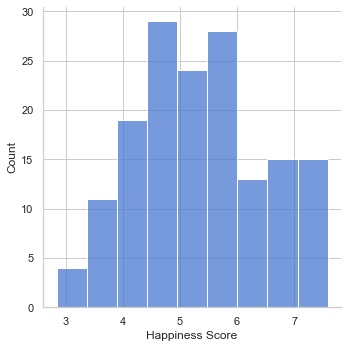

In [4]:
sns.displot(df2015['Happiness Score'])

# Plot the correlations

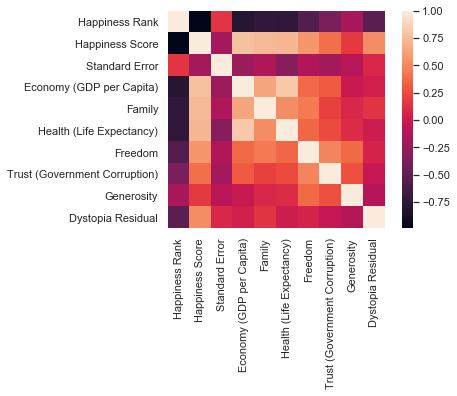

In [5]:
corrmat = df2015.corr()
sns.heatmap(corrmat, square=True)

# Regional Happiness Ranking

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

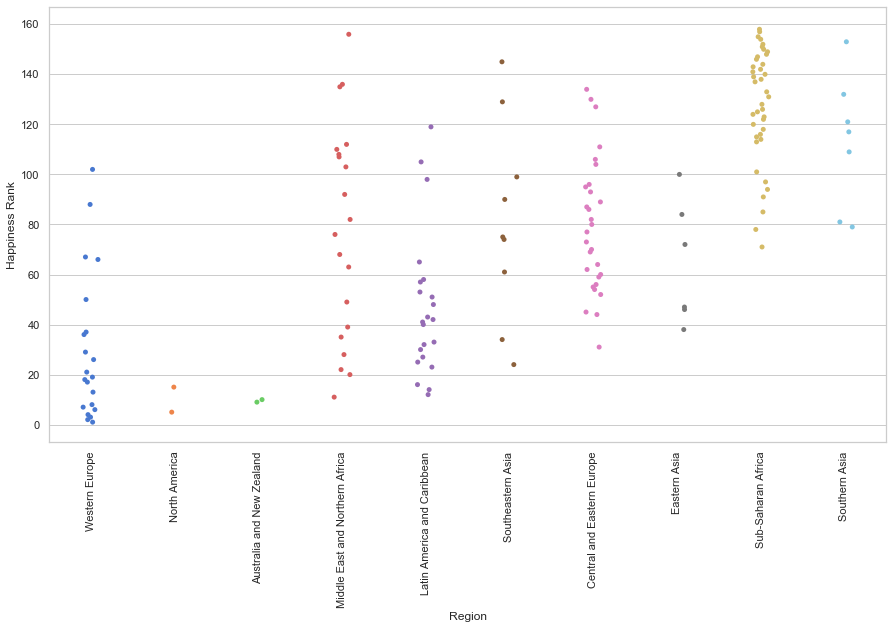

In [6]:
plt.figure(figsize=(15,8))
g = sns.stripplot(x="Region", y="Happiness Rank", data=df2015, jitter=True)
plt.xticks(rotation=90)

# Plot happiness on a map

In [7]:
data = dict(type = 'choropleth', 
           locations = df2015['Country'],
           locationmode = 'country names',
           z = df2015['Happiness Rank'], 
           text = df2015['Country'],
           colorbar = {'title':'Happiness'},
           colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 255, 0)']],
           autocolorscale = False,
           reversescale = True)
layout = dict(title = 'Global Happiness for 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# Investigate Predictions of Future Happiness
First load the 2016 and 2017 data

In [8]:
df2016 = pd.read_csv("./2016.csv")
df2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [9]:
df2017 = pd.read_csv("./2017.csv")
df2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


## Check Austria's position over the 3 years (for fun)

In [10]:
print(df2015.loc[df2015['Country'] == "Austria", 'Happiness Rank'].iloc[0], df2016.loc[df2016['Country'] == "Austria", 'Happiness Rank'].iloc[0], df2017.loc[df2017['Country'] == "Austria", 'Happiness.Rank'].iloc[0])

13 12 13


## Get the data into a state fit to analyse
Check how many countries are in each list

In [11]:
print (df2015.shape[0], df2016.shape[0],df2017.shape[0])

158 157 155


Which countries are in 2015 but not in 2016?

In [12]:
np.setdiff1d(df2015['Country'],df2016['Country'])

array(['Central African Republic', 'Djibouti', 'Lesotho', 'Mozambique',
       'Oman', 'Somaliland region', 'Swaziland'], dtype=object)

Which countries are in 2016 but not in 2015?

In [13]:
np.setdiff1d(df2016['Country'],df2015['Country'])

array(['Belize', 'Namibia', 'Puerto Rico', 'Somalia', 'Somaliland Region',
       'South Sudan'], dtype=object)

Which countries are in 2015 but not in 2017?

In [14]:
np.setdiff1d(df2015['Country'],df2017['Country'])

array(['Comoros', 'Djibouti', 'Hong Kong', 'Laos', 'Oman',
       'Somaliland region', 'Suriname', 'Swaziland', 'Taiwan'],
      dtype=object)

## Create a list of 2015 countries removing those that are not in the 2016 and 2017 lists

In [15]:
df2=df2015
df1=df2[~df2['Country'].isin(np.setdiff1d(df2015['Country'],df2016['Country']))]
df=df1[~df1['Country'].isin(np.setdiff1d(df2015['Country'],df2017['Country']))]
print (df2.shape[0], df1.shape[0], df.shape[0])

158 151 146


In [16]:
df2015ab=df
df2016ab=df2016[df2016['Country'].isin(df['Country'])]
df2017ab=df2017[df2017['Country'].isin(df['Country'])]
print (df2015ab.shape[0], df2016ab.shape[0], df2017ab.shape[0])

146 146 146


In [17]:
df2015sort=df2015ab.sort_values('Country')
df2015sort.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
94,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894


In [18]:
df2016sort=df2016ab.sort_values('Country')
df2016sort.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
108,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816


In [19]:
df2017sort=df2017ab.sort_values('Country')
df2017sort.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
140,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
108,Albania,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442


## Check plots of ranks and scores over years
### 2015 to 2016

Text(0, 0.5, '2016 Happiness Rank')

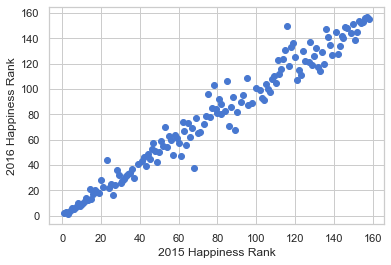

In [21]:
xx=df2015sort['Happiness Rank']
yy=df2016sort['Happiness Rank']
plt.scatter(xx,yy)
plt.xlabel('2015 Happiness Rank')
plt.ylabel('2016 Happiness Rank')

### 2015 to 2017

Text(0, 0.5, '2017 Happiness Rank')

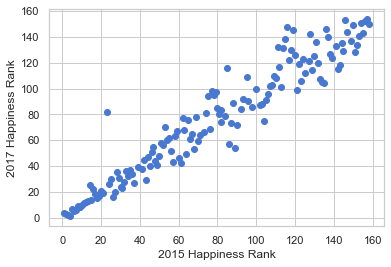

In [22]:
xx=df2015sort['Happiness Rank']
yy=df2017sort['Happiness.Rank']
plt.scatter(xx,yy)
plt.xlabel('2015 Happiness Rank')
plt.ylabel('2017 Happiness Rank')

Point going from position 23 in 2015 to position 82 in 2017 is Venezuela

Text(0, 0.5, '2016 Happiness Score')

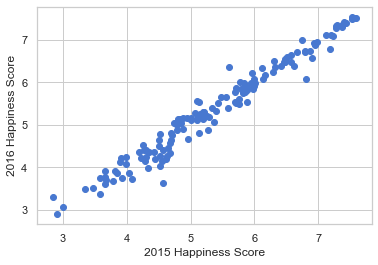

In [23]:
xx=df2015sort['Happiness Score']
yy=df2016sort['Happiness Score']
plt.scatter(xx,yy)
plt.xlabel('2015 Happiness Score')
plt.ylabel('2016 Happiness Score')

Text(0, 0.5, '2017 Happiness Score')

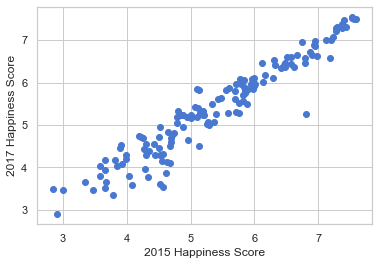

In [24]:
xx=df2015sort['Happiness Score']
yy=df2017sort['Happiness.Score']
plt.scatter(xx,yy)
plt.xlabel('2015 Happiness Score')
plt.ylabel('2017 Happiness Score')

## Use Linear regression to predict future Happiness Score (2016, 2017) based on 2015 Happiness Score
### Start with 2015 to predict 2016

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2015sort['Happiness Score'].values.reshape(-1,1), df2016sort['Happiness Score'].values.reshape(-1,1), test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
print('Coefficients: slope = %6.3f, intercept = %6.3f' % (lm.coef_[0,0], lm.intercept_[0]))
print('Coefficient of Determination R^2: %6.3f' % lm.score(X_train,Y_train))
#store for later
coef_1516=lm.coef_[0,0]
intercept_1516=lm.intercept_[0]

Coefficients: slope =  0.986, intercept =  0.061
Coefficient of Determination R^2:  0.962


Text(0, 0.5, '2016 Happiness Score')

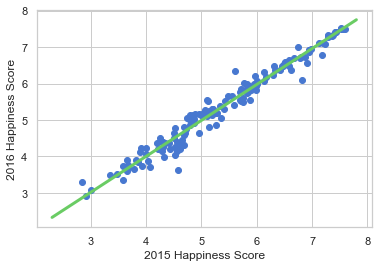

In [26]:
xx=df2015sort['Happiness Score']
yy=df2016sort['Happiness Score']
plt.scatter(xx,yy)
plt.plot([2.3, 7.8], [2.3*lm.coef_[0,0]+lm.intercept_[0], 7.8*lm.coef_[0,0]+lm.intercept_[0]], color='g', linestyle='-', linewidth=3)
plt.xlabel('2015 Happiness Score')
plt.ylabel('2016 Happiness Score')

In [27]:
from sklearn import metrics
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('R^2:', lm.score(X_train,Y_train))

MAE: 0.14519036639038932
MSE: 0.03422546085661885
R^2: 0.9615854143271908


### Now 2015 to predict 2017

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(df2015sort['Happiness Score'].values.reshape(-1,1), df2017sort['Happiness.Score'].values.reshape(-1,1), test_size=0.3, random_state=101)
lm.fit(X_train,Y_train)
print('Coefficients: slope = %6.3f, intercept = %6.3f' % (lm.coef_[0,0], lm.intercept_[0]))
print('Coefficient of Determination R^2: %6.3f' % lm.score(X_train,Y_train))

Coefficients: slope =  0.920, intercept =  0.422
Coefficient of Determination R^2:  0.907


Text(0, 0.5, '2017 Happiness Score')

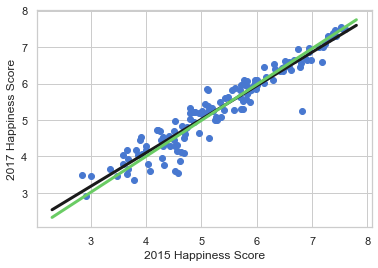

In [29]:
xx=df2015sort['Happiness Score']
yy=df2017sort['Happiness.Score']
plt.scatter(xx,yy)
plt.plot([2.3, 7.8], [2.3*lm.coef_[0,0]+lm.intercept_[0], 7.8*lm.coef_[0,0]+lm.intercept_[0]], color='k', linestyle='-', linewidth=3)
plt.plot([2.3, 7.8], [2.3*coef_1516+intercept_1516, 7.8*coef_1516+intercept_1516], color='g', linestyle='-', linewidth=3)
plt.xlabel('2015 Happiness Score')
plt.ylabel('2017 Happiness Score')

Black is line for 2015-2017, green is line for 2015-2016. Notice that the 2015-2017 line is less steep than the 2015-2016 one.

In [30]:
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('R^2:', lm.score(X_train,Y_train))

MAE: 0.21034324223021264
MSE: 0.0699650362761034
R^2: 0.9070004263014363


Predicting further into the future produces worse predictions (not surprising)!